<a href="https://colab.research.google.com/github/BYRic-F/Data_practice/blob/main/Copie_de_%5BS%5DSujet_Bloc_3_Revision_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML - Régression

## Chargement des données

In [166]:
import pandas as pd

df = pd.read_csv("https://drive.google.com/uc?id=1kdidqx2uZm6FuLRJANTq1w6Il1gh79gh")
df.head()

,student_id,final_score,grade,pass_fail,previous_score,math_prev_score,science_prev_score,language_prev_score,daily_study_hours,attendance_percentage,homework_completion_rate,sleep_hours,screen_time_hours,physical_activity_minutes,motivation_score,exam_anxiety_score,parent_education_level,study_environment
0,S0001,60.137241,D,1,60.599707,61.488212,53.568119,64.972292,1.427203,75.738405,68.534371,6.809352,3.313096,65.059425,4.150025,6.104103,Master,Noisy
1,S0002,99.021977,A,1,92.289287,85.612565,91.873759,89.040461,4.813612,89.602736,91.990197,5.567793,4.925359,76.016617,8.714693,1.982358,High School,Quiet
2,S0003,70.522955,C,1,80.259667,82.160656,72.736065,74.243663,1.240908,81.495426,69.669666,6.702875,5.107888,113.616872,5.928220,4.463662,High School,Moderate
3,S0004,63.448537,D,1,72.926217,75.979145,76.726496,67.715995,2.190601,71.472047,71.976757,7.854439,3.772446,108.686690,4.224928,4.740474,High School,Noisy
4,S0005,66.483019,C,1,48.581025,51.379977,48.993224,46.145011,2.192265,64.276582,68.940591,7.662429,1.898989,42.107294,9.506815,1.143852,Master,Quiet


## Analyse des données

Affichez les informations du dataset

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   student_id                 1000 non-null   object 
 1   final_score                1000 non-null   float64
 2   grade                      1000 non-null   object 
 3   pass_fail                  1000 non-null   int64  
 4   previous_score             1000 non-null   float64
 5   math_prev_score            1000 non-null   float64
 6   science_prev_score         1000 non-null   float64
 7   language_prev_score        1000 non-null   float64
 8   daily_study_hours          1000 non-null   float64
 9   attendance_percentage      1000 non-null   float64
 10  homework_completion_rate   1000 non-null   float64
 11  sleep_hours                1000 non-null   float64
 12  screen_time_hours          1000 non-null   float64
 13  physical_activity_minutes  1000 non-null   float6

Affichez les valeurs manquantes

In [171]:
df.isna().sum()

,0
student_id,0
final_score,0
grade,0
pass_fail,0
previous_score,0
math_prev_score,0
science_prev_score,0
language_prev_score,0
daily_study_hours,0
attendance_percentage,0


Affichez les statistiques des données numériques

In [172]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
final_score,1000.0,70.935159,14.376419,37.364699,60.079082,70.673531,81.830057,100.000000
pass_fail,1000.0,0.930000,0.255275,0.000000,1.000000,1.000000,1.000000,1.000000
previous_score,1000.0,66.964110,16.067555,40.254761,52.978530,67.324406,80.937577,94.984472
math_prev_score,1000.0,67.458590,16.593689,30.235250,53.098000,67.561105,81.380928,104.984169
science_prev_score,1000.0,67.033210,17.105514,25.752553,52.509398,66.133873,81.319085,107.432492
language_prev_score,1000.0,66.906063,16.705229,27.176600,53.562773,66.693546,80.269633,107.561521
daily_study_hours,1000.0,2.984155,1.158047,1.003774,1.985539,2.934717,3.971015,4.997401
attendance_percentage,1000.0,73.275703,9.533937,47.445725,66.256237,73.328172,80.230732,99.111497
homework_completion_rate,1000.0,79.755579,12.360754,51.604853,69.964528,79.393715,89.592788,110.485203
sleep_hours,1000.0,6.964696,0.684015,4.500750,6.518039,6.976139,7.413489,9.353503


Y a-t-il des valeurs aberrantes ?

In [ ]:
"""
Juste les prev_score / math_prev_score / science_prev_score / homework completion rate
"""

Affichez les statistiques des données catégoriques

In [173]:
df.describe(include = ['object'])

,student_id,grade,parent_education_level,study_environment
count,1000,1000,1000,1000
unique,1000,5,3,3
top,S1000,C,Master,Quiet
freq,1,338,351,337


Affichez le nombre de lignes qui dépassent 100 pour chaque colonne concernée.

In [174]:
colonnes_sup = ['math_prev_score', 'science_prev_score', 'language_prev_score','homework_completion_rate' ]

nombre_de_lignes = (df[colonnes_sup] > 100).sum().reset_index().rename(columns = {0 : "nombre de lignes > 100"})
nombre_de_lignes

,index,nombre de lignes > 100
0,math_prev_score,6
1,science_prev_score,11
2,language_prev_score,8
3,homework_completion_rate,47


Modifiez les colonnes de score et de pourcentage pour que leur valeur ne dépasse pas 100




In [175]:
df[colonnes_sup] = df[colonnes_sup].clip(upper=100)

Encodez les colonnes grade, parent_education_level et study_environment.

Pour grade :
* A : 4
* B : 3
* C : 2
* D : 1

Pour parent_education_level :
* High School : 1
* Bachelor : 2
* Master : 3

Pour study_environment :
* Noisy : 1
* Moderate : 2
* Quiet : 3


In [176]:
dico_grade = {'A' : 4,
'B' : 3,
'C' : 2,
'D' : 1}

dico_parent_education ={'High School' : 1,
'Bachelor' : 2,
'Master' : 3}

dico_study_environnement = {'Noisy' : 1,
'Moderate' : 2,
'Quiet' : 3}

df['grade'] = df['grade'].map(dico_grade)
df['parent_education_level'] = df['parent_education_level'].map(dico_parent_education)
df['study_environment'] = df['study_environment'].map(dico_study_environnement)
df

,student_id,final_score,grade,pass_fail,previous_score,math_prev_score,science_prev_score,language_prev_score,daily_study_hours,attendance_percentage,homework_completion_rate,sleep_hours,screen_time_hours,physical_activity_minutes,motivation_score,exam_anxiety_score,parent_education_level,study_environment
0,S0001,60.137241,1.0,1,60.599707,61.488212,53.568119,64.972292,1.427203,75.738405,68.534371,6.809352,3.313096,65.059425,4.150025,6.104103,3,1
1,S0002,99.021977,4.0,1,92.289287,85.612565,91.873759,89.040461,4.813612,89.602736,91.990197,5.567793,4.925359,76.016617,8.714693,1.982358,1,3
2,S0003,70.522955,2.0,1,80.259667,82.160656,72.736065,74.243663,1.240908,81.495426,69.669666,6.702875,5.107888,113.616872,5.928220,4.463662,1,2
3,S0004,63.448537,1.0,1,72.926217,75.979145,76.726496,67.715995,2.190601,71.472047,71.976757,7.854439,3.772446,108.686690,4.224928,4.740474,1,1
4,S0005,66.483019,2.0,1,48.581025,51.379977,48.993224,46.145011,2.192265,64.276582,68.940591,7.662429,1.898989,42.107294,9.506815,1.143852,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S0996,59.206313,1.0,1,45.037014,38.436901,43.612637,47.394726,4.638258,69.249006,96.251273,6.816746,4.582381,64.714504,9.342533,2.890583,2,1
996,S0997,79.122551,2.0,1,90.452247,87.393401,89.171348,81.296522,2.078520,84.259602,67.662648,7.933475,2.932469,111.320337,5.620030,3.687013,3,3
997,S0998,50.601257,1.0,1,47.525025,47.339841,46.317537,41.382806,4.278708,71.120438,96.521984,7.501127,2.056315,51.508793,4.209895,6.816193,3,1
998,S0999,89.253071,3.0,1,92.263054,90.116543,91.954233,81.885114,4.997401,86.022243,100.000000,6.557973,4.163385,48.586185,5.566401,5.277389,1,1


Supprimez la colonne Student_id

In [177]:
df = df.drop(columns= "student_id")

Affichez les corrélations entre final_score et les autres valeurs

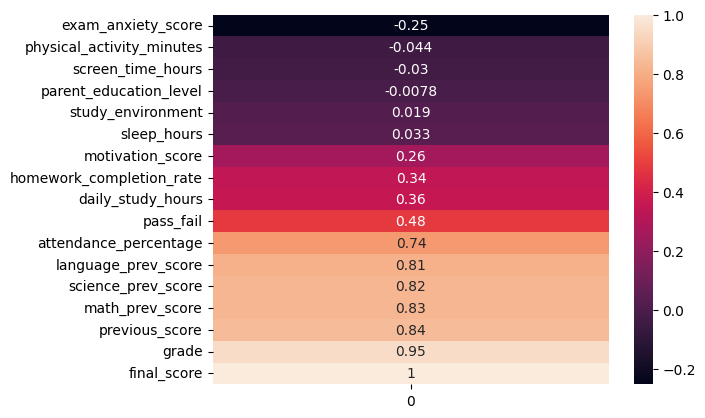

In [178]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation  = df.corrwith(df['final_score'])

corr_ok = correlation.sort_values().to_frame()
sns.heatmap(corr_ok, annot=True, cmap='rocket')
plt.show()

## Préparation des données et du modèle

Supprimez les colonnes 'grade' et 'pass_fail' qui sont liées à final_score.

Préparez les features X et la cible y (final_score) avec un ratio train/test de 70/30 et random_state 42

In [184]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = ['final_score', 'grade', 'pass_fail'])
y = df['final_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

Entraînez un modèle de régression linéaire, affichez ses scores d'entrainement et de test.

In [185]:
from sklearn.linear_model import LinearRegression

model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

score_train = model_linear.score(X_train, y_train)
score_test = model_linear.score(X_test, y_test)

print(f"score_train  {score_train}")

print(f"score_test  {score_test}")

score_train  0.878448368470576
score_test  0.893618237494588


Affichez le MAE et le RMSE : le modèle semble-t-il performant ?

In [193]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

y_test_predict = model_linear.predict(X_test)

mae = mean_absolute_error(y_test, y_test_predict)
rmse = root_mean_squared_error(y_test, y_test_predict)

print(f"rmse = {rmse}, mae = {mae}")

rmse = 4.771828806807435, mae = 3.784940628253564


In [ ]:
"""
LE score est bon : On se trompe en moyenne de 3.70 points / 100
et en plus, nous n'avons pas de grosses erreurs car le rmse n'a qu'un point de difference alors qu'on a mis les erreurs au carré

"""

Affichez un histogramme des erreurs : cela valide-t-il l'hypothèse précédente ?

<Axes: ylabel='Frequency'>

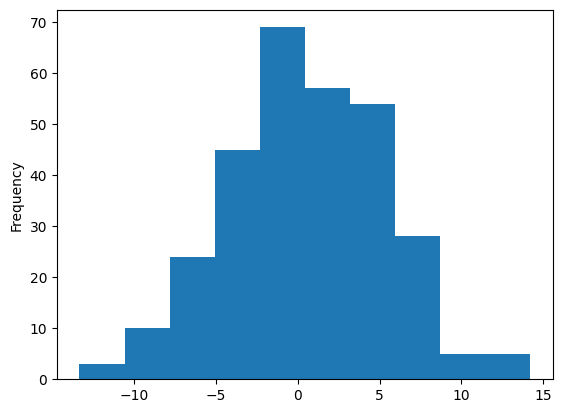

In [187]:
df_test = X_test.copy()
df_test['final_score'] = y_test
df_test["predict"] = model_linear.predict(X_test)
df_test["difference_predict"] = df_test['final_score'] - df_test['predict']
df_test["difference_predict"].plot.hist()

Affichez un scatterplot montrant les différentes entre valeurs réelles et valeurs prédites.

<Axes: xlabel='final_score', ylabel='predict'>

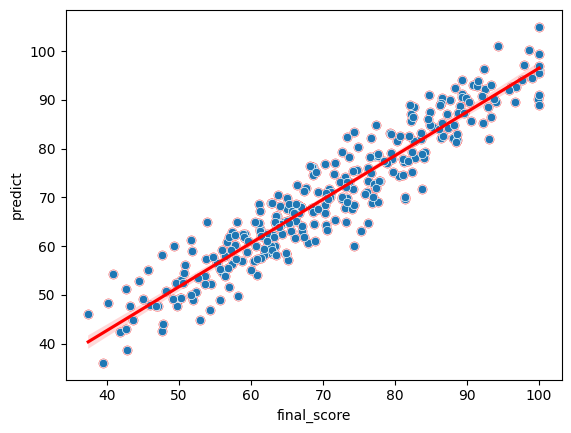

In [188]:
import matplotlib.pyplot as plt

sns.regplot( df_test,x= "final_score", y = "predict", color = "red")
sns.scatterplot(df_test, x= "final_score", y = "predict")


# ML - Classification

## Chargement des données

In [189]:
import pandas as pd

df = pd.read_csv("https://drive.google.com/uc?id=1_sR-leO6BMH09xQZW8-i1g5QGwSyHzSK")
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


Affichez les informations sur le dataframe

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

Affichez les valeurs manquantes

In [194]:
df.isna().sum()

,0
Age,0
Sex,0
Chest pain type,0
BP,0
Cholesterol,0
FBS over 120,0
EKG results,0
Max HR,0
Exercise angina,0
ST depression,0


Encodez la colonne 'Heart Disease' avec 1 pour présence, et 0 pour absence

In [195]:
df["Heart Disease"].unique()

array(['Presence', 'Absence'], dtype=object)

In [196]:
dic_hearth = {'Presence' : 1 , 'Absence' : 0}

df["Heart Disease"] = df['Heart Disease'].map(dic_hearth)
df.sample(5)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
46,49,1,3,118,149,0,2,126,0,0.8,1,3,3,1
223,63,1,4,130,330,1,2,132,1,1.8,1,3,7,1
49,65,0,4,150,225,0,2,114,0,1.0,2,3,7,1
181,56,0,4,134,409,0,2,150,1,1.9,2,2,7,1
165,64,0,4,180,325,0,0,154,1,0.0,1,0,3,0


## Analyse des données

Affichez les statistiques du dataframe

In [197]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,270.0,54.433333,9.109067,29.0,48.0,55.0,61.0,77.0
Sex,270.0,0.677778,0.468195,0.0,0.0,1.0,1.0,1.0
Chest pain type,270.0,3.174074,0.950090,1.0,3.0,3.0,4.0,4.0
BP,270.0,131.344444,17.861608,94.0,120.0,130.0,140.0,200.0
Cholesterol,270.0,249.659259,51.686237,126.0,213.0,245.0,280.0,564.0
FBS over 120,270.0,0.148148,0.355906,0.0,0.0,0.0,0.0,1.0
EKG results,270.0,1.022222,0.997891,0.0,0.0,2.0,2.0,2.0
Max HR,270.0,149.677778,23.165717,71.0,133.0,153.5,166.0,202.0
Exercise angina,270.0,0.329630,0.470952,0.0,0.0,0.0,1.0,1.0
ST depression,270.0,1.050000,1.145210,0.0,0.0,0.8,1.6,6.2


Affichez une heatmap de corrélation des variables

<Axes: >

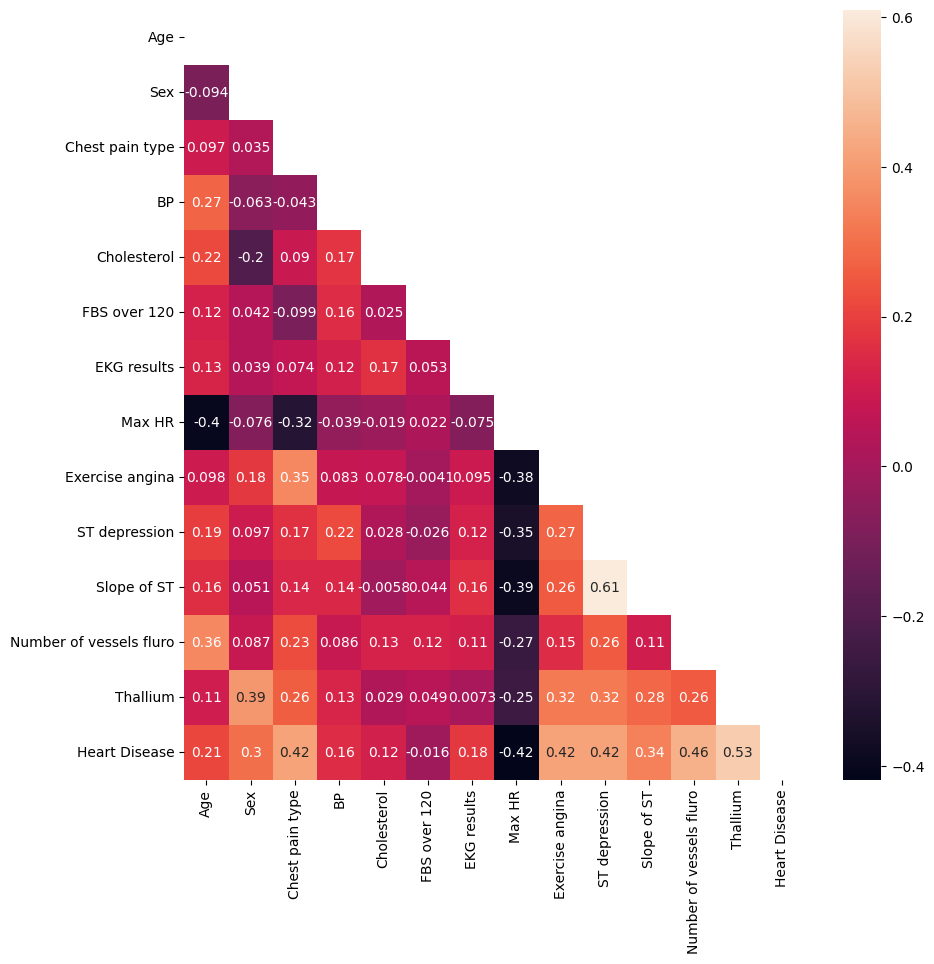

In [198]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10,10))
corr = df.corr()
# fais un mask triangle sup (np.triu), de la taille du tableau corr (np.ones_like)
mask = np.triu(np.ones_like(corr))

sns.heatmap(corr, annot = True, mask= mask)

## Préparation des données et du modèle

 Préparez les features X et la cible y ('Heart Disease') avec un ratio train/test de 70/30 et random_state 42

In [206]:
from sklearn.model_selection import train_test_split
X = df.drop(columns = "Heart Disease")
y = df["Heart Disease"]
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state = 42 , test_size= 0.3, stratify = y)

Entrainez un modèle Random Forest Classifier et affichez ses score d'entrainement et de test.

In [207]:
from sklearn.ensemble import RandomForestClassifier

model_random = RandomForestClassifier()
model_random.fit(X_train, y_train)

score_train = model_random.score(X_train, y_train)
score_test = model_random.score(X_test, y_test)

print(f"Score (train) : {score_train}, Score (test) : {score_test}")

Score (train) : 1.0, Score (test) : 0.8641975308641975


Y a-t-il surapprentissage ?

In [ ]:
"""
oui le score du train est a 1
"""

Affichez le rapport de classification : le modèle détecte-t-il correctement les patient à risque ?

In [208]:
from sklearn.metrics import classification_report

y_pred_test = model_random.predict(X_test)

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87        45
           1       0.82      0.89      0.85        36

    accuracy                           0.86        81
   macro avg       0.86      0.87      0.86        81
weighted avg       0.87      0.86      0.86        81



In [ ]:
"""
Le modèle parvient à détecter 89% des malades à risque, ce qui est un résultat satisfaisant.
"""

A présent, entraînez un modèle SVC pour la classification. Le modèle est-il plus performant ? Pourquoi ?

In [212]:
from sklearn.svm import LinearSVC


model_svc = LinearSVC()
model_svc.fit(X_train, y_train)

score_train = model_svc.score(X_train, y_train)
score_test = model_svc.score(X_test, y_test)
y_pred_test = model_svc.predict(X_test)
print(f"Score (train) : {score_train}, Score (test) : {score_test}")
print(classification_report(y_test, y_pred_test))

Score (train) : 0.8412698412698413, Score (test) : 0.8765432098765432
              precision    recall  f1-score   support

           0       0.93      0.84      0.88        45
           1       0.82      0.92      0.87        36

    accuracy                           0.88        81
   macro avg       0.88      0.88      0.88        81
weighted avg       0.88      0.88      0.88        81



In [ ]:
"""
Oui car il detecte plus de malades
"""

# ML - Questions

In [ ]:
# Q1. Quelles sont les trois grandes familles d’apprentissage automatique ?
def reponse_q1():
    """
supervisé, non supervisé, par renforcement
    """
    pass


In [ ]:
# Q2. Quelle est la différence entre apprentissage supervisé et non supervisé ?
def reponse_q2():
    """
apprentissage supervisé a la target pour predire a l'inverse du non supervisé
    """
    pass


In [ ]:
# Q3. Qu'est-ce qu'une "feature" et une "target" ?
def reponse_q3():
    """

    """
    pass


In [ ]:
# Q4. Que signifie "overfitting" et "underfitting" ?
def reponse_q4():
    """

    """
    pass


In [ ]:
# Q5. Associez chaque modèle à sa famille (supervisé ou non supervisé / classification ou regression ou les deux):
# - Régression logistique
# - K-means (Nearest Neighbors)
# - Arbre de décision
# - Regression Linéaire

def reponse_q5():
    """

    """
    pass


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit([[1], [2], [3]], [2, 4, 6])

# Q6. Que fait ce code, trouver l'equation de regression y = ax?
def reponse_q6():
    """

    """
    pass


In [ ]:
# Q7. Que renverra model.predict([[4]]) ?
def reponse_q7():
    """

    """
    pass


In [ ]:
# Q8. Quelles sont les principales métriques pour évaluer :
# a) Une régression
# b) Une classification binaire
def reponse_q8():
    """

    """
    pass


In [ ]:
# Q9. À quoi sert la validation croisée ?
def reponse_q9():
    """

    """
    pass


In [ ]:
# Q10. À quoi sert un pipeline dans Scikit-Learn ?
def reponse_q10():
    """

    """
    pass


In [ ]:
# Q11. Pourquoi est-il important d’inclure le prétraitement dans le pipeline ?
def reponse_q11():
    """

    """
    pass


In [ ]:
# Q12. Quelle est la différence entre une variable qualitative et quantitative ?
def reponse_q12():
    """

    """
    pass


In [ ]:
# Q13. Citez deux méthodes courantes pour encoder une variable catégorielle.
def reponse_q13():
   """

   """
    pass


In [ ]:
# Q14. Pourquoi faut-il standardiser ou normaliser les variables quantitatives ?
def reponse_q14():
    """

    """
    pass


In [ ]:
# Q15. Quelle est la différence entre Accuracy, Recall et Precision ?
def reponse_q15():
    """

    """
    pass


In [ ]:
# Q16. Pourquoi l’accuracy peut être trompeuse dans un jeu de données déséquilibré ?
def reponse_q16():
    """

    """
    pass


In [ ]:
# Q17. Quelle est la meilleure métrique à utiliser dans les cas suivants :
# a) Détection de fraude
# b) Diagnostic médical

def reponse_q18():
    """

    """
    pass
